# Project: Instacart Basket Analysis
## Author: Cassy Stunkel
## Task 4.10, Part 1 - Notebook 4

## Table of Contents
## 01. Import Libraries and Dataset
## 02. Profile Distribution
## 03. Ordering Habits
## 03.1 Usage Frequency
## 03.2 Expenditure
## 04. Regional Analytics
## 05. Department Analytics

## 01. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'/Users/cassystunkel/Documents/Instacart Basket Analysis'

In [3]:
# Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profiling_complete.pkl'))

In [4]:
# Check size
df.shape

(24436791, 19)

In [5]:
# Check header
df.head()

,order_id,user_id,days_since_prior_order,department_id,prices,age,number_of_dependants,income,region,age_profile,dependents_profile,income_profile,customer_profile,min_spend_per_customer_profile,max_spend_per_customer_profile,avg_spend_per_customer_profile,min_usage_per_customer_profile,max_usage_per_customer_profile,avg_usage_per_customer_profile
0,3139998,138,3.0,19,5.8,81,1,49620,Midwest,Senior,Children,Low income,Senior_Children_Low income,1.0,25.0,6.511265,0.0,30.0,10.267944
1,1977647,138,20.0,19,5.8,81,1,49620,Midwest,Senior,Children,Low income,Senior_Children_Low income,1.0,25.0,6.511265,0.0,30.0,10.267944
3,2254091,138,6.0,12,20.0,81,1,49620,Midwest,Senior,Children,Low income,Senior_Children_Low income,1.0,25.0,6.511265,0.0,30.0,10.267944
4,505689,138,7.0,10,12.9,81,1,49620,Midwest,Senior,Children,Low income,Senior_Children_Low income,1.0,25.0,6.511265,0.0,30.0,10.267944
5,960220,138,19.0,4,1.7,81,1,49620,Midwest,Senior,Children,Low income,Senior_Children_Low income,1.0,25.0,6.511265,0.0,30.0,10.267944


In [6]:
# View full list of column names
df.dtypes

order_id                            int64
user_id                             int64
days_since_prior_order            float64
department_id                       int64
prices                            float64
age                                 int64
number_of_dependants                int64
income                              int64
region                             object
age_profile                        object
dependents_profile                 object
income_profile                     object
customer_profile                   object
min_spend_per_customer_profile    float64
max_spend_per_customer_profile    float64
avg_spend_per_customer_profile    float64
min_usage_per_customer_profile    float64
max_usage_per_customer_profile    float64
avg_usage_per_customer_profile    float64
dtype: object

In [4]:
# Create a subset to avoid any RAM issues
variables = ['order_id', 'user_id', 'days_since_prior_order', 'department_id', 'prices', 'region', 'customer_profile']
cust_prof = df.loc[:, variables]

In [8]:
# Check dataframe size
cust_prof.shape

(24436791, 7)

In [9]:
# Check headers
cust_prof.head()

,order_id,user_id,days_since_prior_order,department_id,prices,region,customer_profile
0,3139998,138,3.0,19,5.8,Midwest,Senior_Children_Low income
1,1977647,138,20.0,19,5.8,Midwest,Senior_Children_Low income
3,2254091,138,6.0,12,20.0,Midwest,Senior_Children_Low income
4,505689,138,7.0,10,12.9,Midwest,Senior_Children_Low income
5,960220,138,19.0,4,1.7,Midwest,Senior_Children_Low income


## 02. Profile Distribution

In [10]:
# Show frequency of the different customer profiles
distribution = cust_prof['customer_profile'].value_counts(dropna=False)

In [11]:
distribution

customer_profile
Adult_Children_Middle income             6235972
Senior_Children_Middle income            4296615
Young adult_Children_Middle income       4288413
Adult_No children_Middle income          2113455
Young adult_Children_Low income          2026708
Senior_No children_Middle income         1421180
Young adult_No children_Middle income    1412200
Adult_Children_Low income                 831653
Young adult_No children_Low income        674472
Senior_Children_Low income                537056
Adult_No children_Low income              287077
Senior_No children_Low income             162901
Adult_Children_High income                 57614
Senior_Children_High income                34425
Adult_No children_High income              20570
Young adult_Children_High income           17548
Senior_No children_High income             11805
Young adult_No children_High income         7127
Name: count, dtype: int64

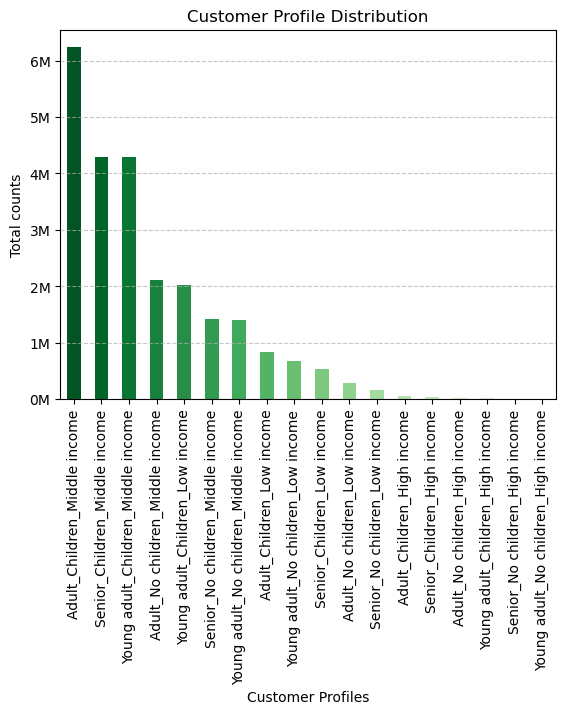

In [12]:
# Creating bar chart to show comparative frequencies of customer profiles
# Reverse the 'greens' colormap
colors = sns.color_palette("Greens", len(distribution))
colors = list(reversed(colors))

ax = distribution.plot.bar(color=colors)

#Adding main title
plt.title("Customer Profile Distribution")

#Adding x-axis label
plt.xlabel("Customer Profiles")

#Adding y-axis label
plt.ylabel("Total counts")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_prof_dist.png'), bbox_inches='tight', pad_inches=0.1)

#Show plot
plt.show()

The top 4 customer profiles all share a common characteristic: a middle income level. In fact, all middle income customer profiles take up 6 of the top 7 customer profile slots.

## 03. Ordering Habits

### 03.1 Usage Frequency

In [5]:
#Create pivot table comparing customer profiles and their average 'days_since_prior_order'
avg_pivot = pd.pivot_table(cust_prof, values='days_since_prior_order', index='customer_profile', aggfunc=np.mean)

/var/folders/qs/9lwsjk_n1zl8hh4scgkrzq6h0000gn/T/ipykernel_2471/698383790.py:2: FutureWarning: The provided callable <function mean at 0x109a01620> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_pivot = pd.pivot_table(cust_prof, values='days_since_prior_order', index='customer_profile', aggfunc=np.mean)


In [14]:
avg_pivot

,days_since_prior_order
customer_profile,
Adult_Children_High income,9.571788
Adult_Children_Low income,10.522857
Adult_Children_Middle income,10.071763
Adult_No children_High income,8.466164
Adult_No children_Low income,10.099008
Adult_No children_Middle income,9.972466
Senior_Children_High income,9.872273
Senior_Children_Low income,10.267944
Senior_Children_Middle income,10.058227


In [6]:
# Sort in descending order
avg_pivot = avg_pivot.sort_values(by='days_since_prior_order')

In [16]:
avg_pivot

,days_since_prior_order
customer_profile,
Adult_No children_High income,8.466164
Senior_No children_High income,9.171961
Adult_Children_High income,9.571788
Senior_Children_High income,9.872273
Adult_No children_Middle income,9.972466
Senior_No children_Middle income,10.016519
Young adult_Children_Middle income,10.026691
Senior_Children_Middle income,10.058227
Adult_Children_Middle income,10.071763


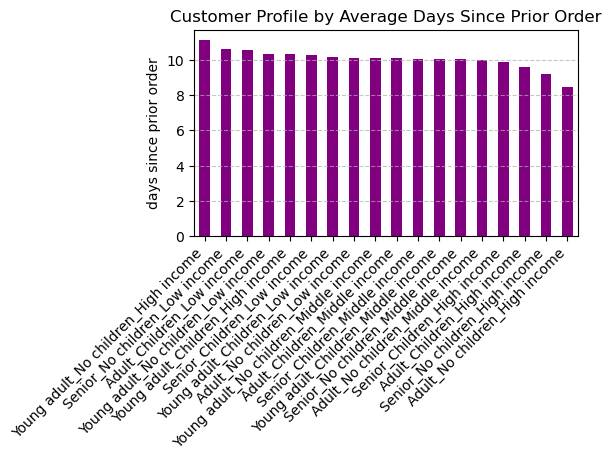

In [25]:
# Plot bar chart
avg_us_bar = avg_pivot.plot.bar(color = ['purple'])

# Add labels and a title
plt.xlabel('')
plt.ylabel('days since prior order')
plt.title('Customer Profile by Average Days Since Prior Order')

# Invert x axis
plt.gca().invert_xaxis()

# Rotate x-axis labels for better readability
avg_us_bar.set_xticklabels(avg_us_bar.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Remove legend
plt.legend('', frameon=False)

# Adjust margins to fit customer_profile labels
plt.subplots_adjust(bottom=0.45)
plt.subplots_adjust(left=.30)

# Exort the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_prof_by_avg_dspo.png'))

# Show the plot
plt.show()

We can see a new trend begin to emerge as we examine customer profiles by average usage: the 'high income' profiles take 4 of the top 5 slots. Our previous top 4 profiles (all with a middle income level) have less frequent usage habits.

### 03.2 Expenditure

In [36]:
# Create a pivot table comparing customer profiles and their total prices
tot_prices_pivot = pd.pivot_table(cust_prof, values='prices', index='customer_profile', aggfunc=np.sum)

# Sort in descending order
tot_prices_pivot = tot_prices_pivot.sort_values(by='prices', ascending = False)

/var/folders/qs/9lwsjk_n1zl8hh4scgkrzq6h0000gn/T/ipykernel_2471/1746261340.py:2: FutureWarning: The provided callable <function sum at 0x1099eff60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tot_prices_pivot = pd.pivot_table(cust_prof, values='prices', index='customer_profile', aggfunc=np.sum)


In [37]:
tot_prices_pivot

,prices
customer_profile,
Adult_Children_Middle income,49602442.6
Senior_Children_Middle income,34193104.8
Young adult_Children_Middle income,34083170.5
Adult_No children_Middle income,16811931.4
Young adult_Children_Low income,15116493.6
Senior_No children_Middle income,11308484.8
Young adult_No children_Middle income,11229270.4
Adult_Children_Low income,5498270.7
Young adult_No children_Low income,5017034.3


In [38]:
# Calculating total sales
total_sales = tot_prices_pivot['prices'].sum()
print(total_sales)

190464481.70000002


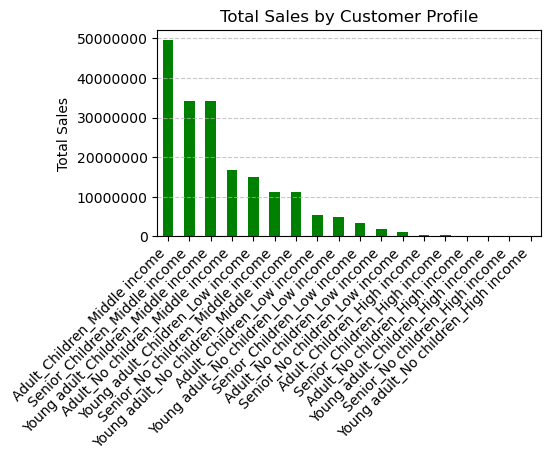

In [49]:
# Plot bar chart
tot_prices_bar = tot_prices_pivot.plot.bar(color = ['green'])

# Add labels and a title
plt.xlabel('')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Profile')

# Set y-axis labels to turn off scientific notation and display actual values
tot_prices_bar.yaxis.get_major_formatter().set_scientific(False)
tot_prices_bar.yaxis.get_major_formatter().set_useOffset(False)

# Rotate x-axis labels for better readability
tot_prices_bar.set_xticklabels(tot_prices_bar.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits
plt.tight_layout

# Remove legend
plt.legend('', frameon=False)

# Adjust margins to fit customer_profile labels
plt.subplots_adjust(bottom=0.45)
plt.subplots_adjust(left=.30)

# Exort the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_tot_sales_cust_prof.png'))

# Remove legend
plt.legend('', frameon=False)

# Show the plot
plt.show()

In [50]:
# Export bar chart
tot_prices_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_tot_sales_cust_prof.png'))

Middle income customer profiles contribute significantly to profits, being responsible for 82.5% of total sales.

## 04. Regional Analytics

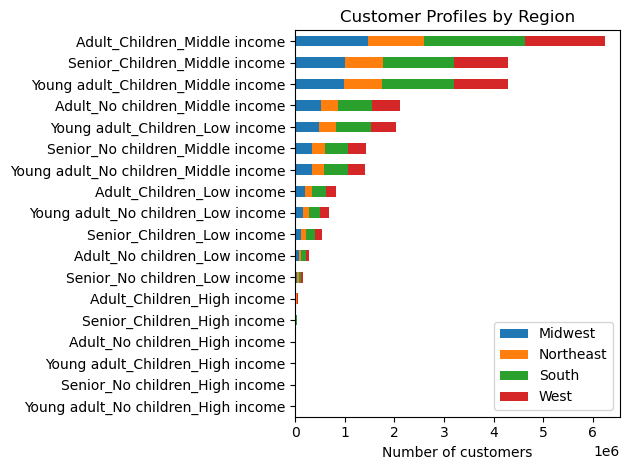

In [24]:
# Make customer profiles by region stacked bar chart

# Group by 'customer_profile' and 'Region', and count the occurrences
profile_region_counts = cust_prof.groupby(['customer_profile', 'region']).size().unstack()

# Calculate the total number of customer profiles for each region
total_customers = profile_region_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = profile_region_counts.loc[total_customers.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
regional_bar = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of customers')
plt.ylabel('')
plt.title('Customer Profiles by Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Region')

# Move legend to lower right
plt.legend(loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

In [25]:
# Export the bar chart
regional_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_profs_by_regions.png'))

In [26]:
sorted_data

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult_Children_Middle income,1475096,1111953,2037908,1611015
Senior_Children_Middle income,995991,775913,1423679,1101032
Young adult_Children_Middle income,988938,759609,1443109,1096757
Adult_No children_Middle income,510618,342405,700688,559744
Young adult_Children_Low income,478491,351689,690031,506497
Senior_No children_Middle income,329339,266227,460301,365313
Young adult_No children_Middle income,333899,243808,484867,349626
Adult_Children_Low income,190846,142738,283441,214628
Young adult_No children_Low income,147423,123041,226321,177687


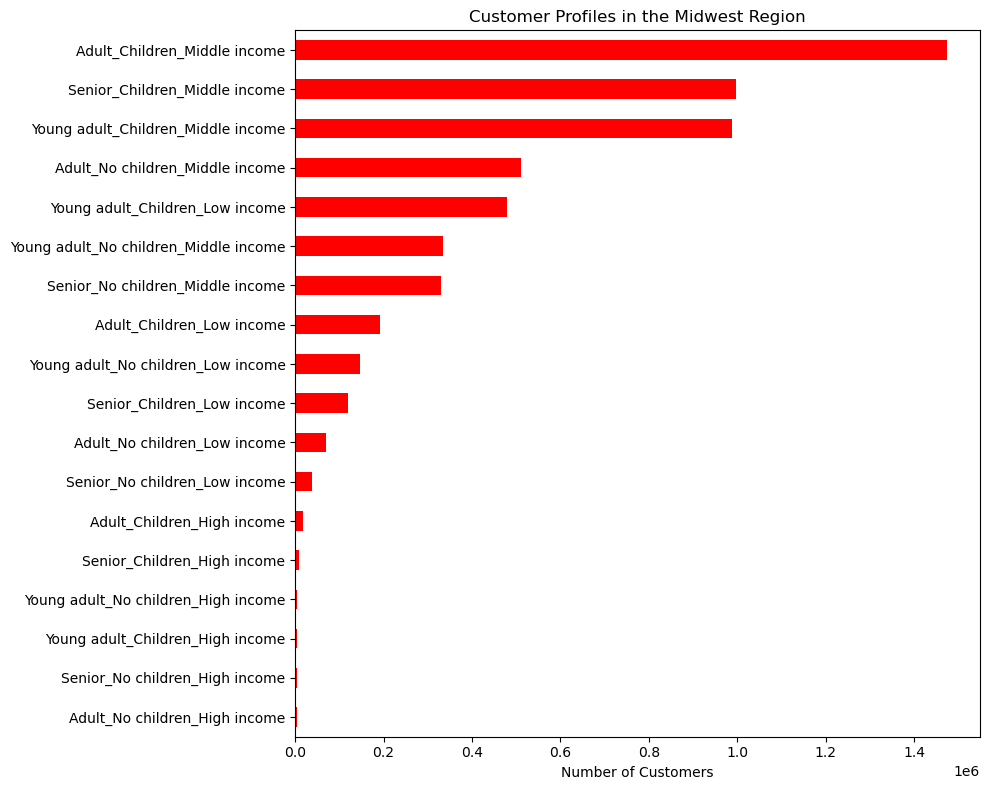

In [52]:
# Customer profiles by 'Midwest' horizontal bar chart

# Filter the DataFrame for the 'South' region
midwest_data = cust_prof[cust_prof['region'] == 'Midwest']

# Get the counts of each 'customer_profile' within the 'Midwest' region
midwest_profile_counts = midwest_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'Midwest' region
plt.figure(figsize=(10, 8)) 

midwest_profile_counts.plot(kind='barh', color='red')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the Midwest Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_midwest.png'))

# Show the plot
plt.show()

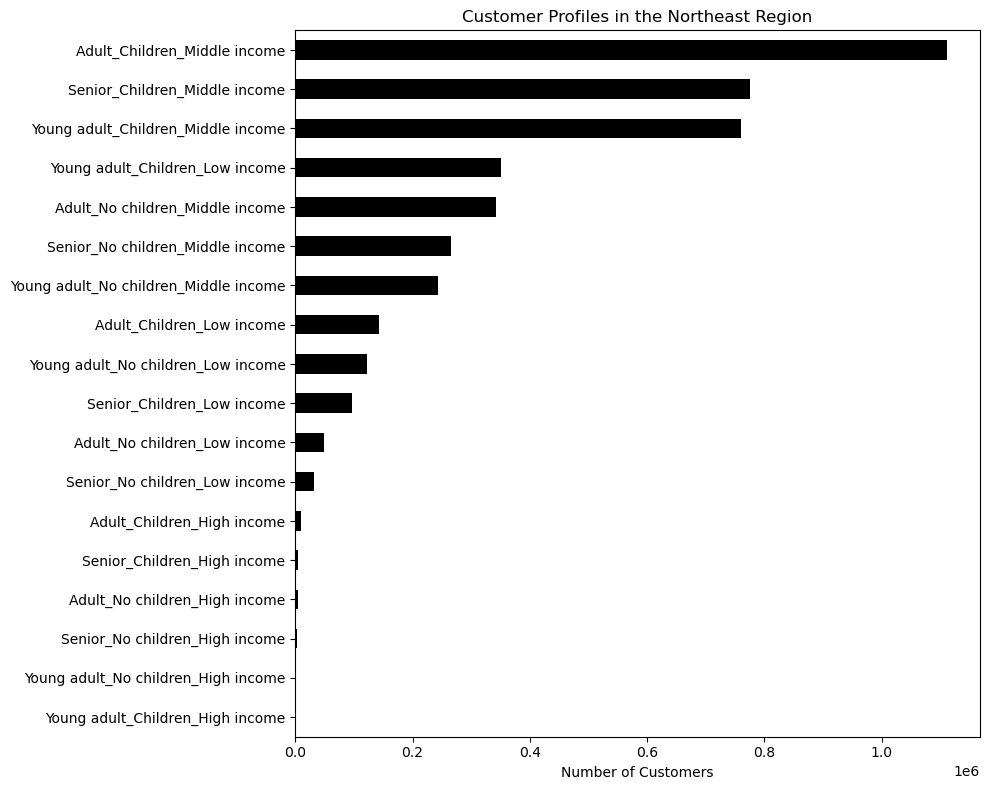

In [59]:
# Customer profiles by 'Northeast' horizontal bar chart

# Filter the DataFrame for the 'Northeast' region
northeast_data = cust_prof[cust_prof['region'] == 'Northeast']

# Get the counts of each 'customer_profile' within the 'Northeast' region
northeast_profile_counts = northeast_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'Northeast' region
plt.figure(figsize=(10, 8)) 

northeast_profile_counts.plot(kind='barh', color='black')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the Northeast Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_northeast.png'))

# Show the plot
plt.show()

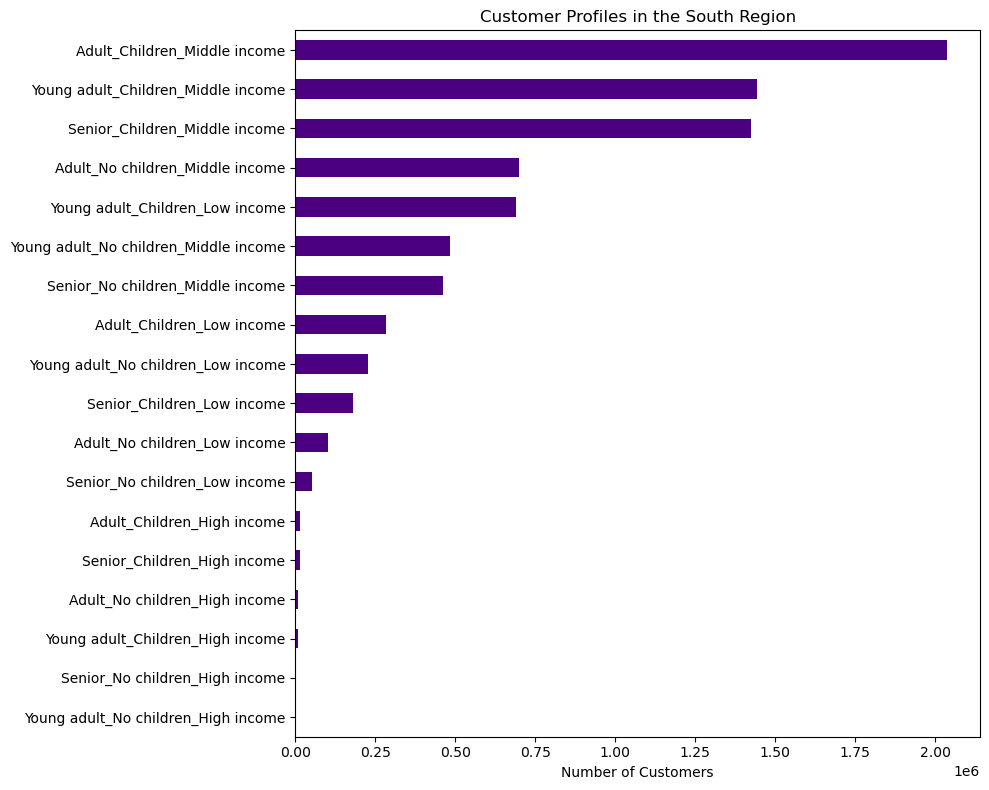

In [61]:
# Customer profiles by 'South' horizontal bar chart

# Filter the DataFrame for the 'South' region
south_data = cust_prof[cust_prof['region'] == 'South']

# Get the counts of each 'customer_profile' within the 'South' region
south_profile_counts = south_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'South' region
plt.figure(figsize=(10, 8)) 

south_profile_counts.plot(kind='barh', color='indigo')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the South Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_south.png'))

# Show the plot
plt.show()

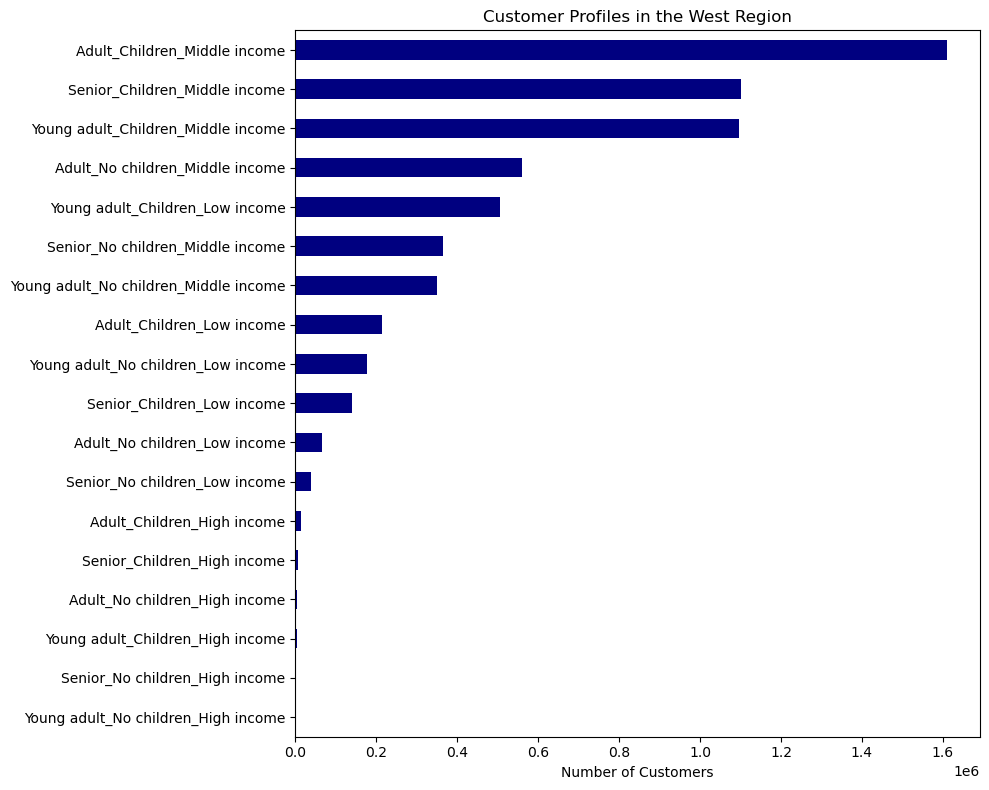

In [62]:
# Customer profiles by 'West' horizontal bar chart

# Filter the DataFrame for the 'West' region
west_data = cust_prof[cust_prof['region'] == 'West']

# Get the counts of each 'customer_profile' within the 'West' region
west_profile_counts = west_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'West' region
plt.figure(figsize=(10, 8)) 

west_profile_counts.plot(kind='barh', color='navy')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the West Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_west.png'))

# Show the plot
plt.show()

Adults with chidlren at the middle income level continue as the top customer profile across all US regions. The middle income profile continues to stand out as the top mutual customer characteristic across regions. The number of customers across regions in the high income bracket are consistently lowest.

## 05. Department Analytics

In [31]:
# Create a subset to avoid RAM issues
# Selecting columns to avoid RAM memory issues
variables = ['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']
cust_departments = cust_prof.loc[:, variables]

In [32]:
# View results
cust_departments.shape

(24436791, 5)

In [33]:
# View results
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile
0,3139998,138,19,5.8,Senior_Children_Low income
1,1977647,138,19,5.8,Senior_Children_Low income
3,2254091,138,12,20.0,Senior_Children_Low income
4,505689,138,10,12.9,Senior_Children_Low income
5,960220,138,4,1.7,Senior_Children_Low income


In [34]:
# View data types
cust_departments.dtypes

order_id              int64
user_id               int64
department_id         int64
prices              float64
customer_profile     object
dtype: object

In [36]:
# Creating a variable containing the department names
# Creating a dictionary

department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [37]:
# View dictionary
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [38]:
#Convert 'department_id' to string to match the keys in the dictionary
cust_departments['department_id'] = cust_departments['department_id'].astype(str)

In [39]:
# Map 'department_id' to 'department_name' using the dictionary
cust_departments['department_name'] = cust_departments['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [40]:
# View results to ensure 'department_name' was added
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
0,3139998,138,19,5.8,Senior_Children_Low income,snacks
1,1977647,138,19,5.8,Senior_Children_Low income,snacks
3,2254091,138,12,20.0,Senior_Children_Low income,meat seafood
4,505689,138,10,12.9,Senior_Children_Low income,bulk
5,960220,138,4,1.7,Senior_Children_Low income,produce


In [41]:
# Count values within new column
cust_departments['department_name'].value_counts(dropna = False)

department_name
produce            7227091
dairy eggs         4132060
snacks             2187121
beverages          2036466
frozen             1628844
pantry             1385520
bakery              886698
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           530401
meat seafood        523891
babies              335947
personal care       328569
international       197900
alcohol             108002
pets                 72115
missing              57567
bulk                 27558
other                27166
Name: count, dtype: int64

In [42]:
# Check flags to ensure nothing strange
cust_departments.groupby('department_name').agg({'department_id' : ['min', 'max']})

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

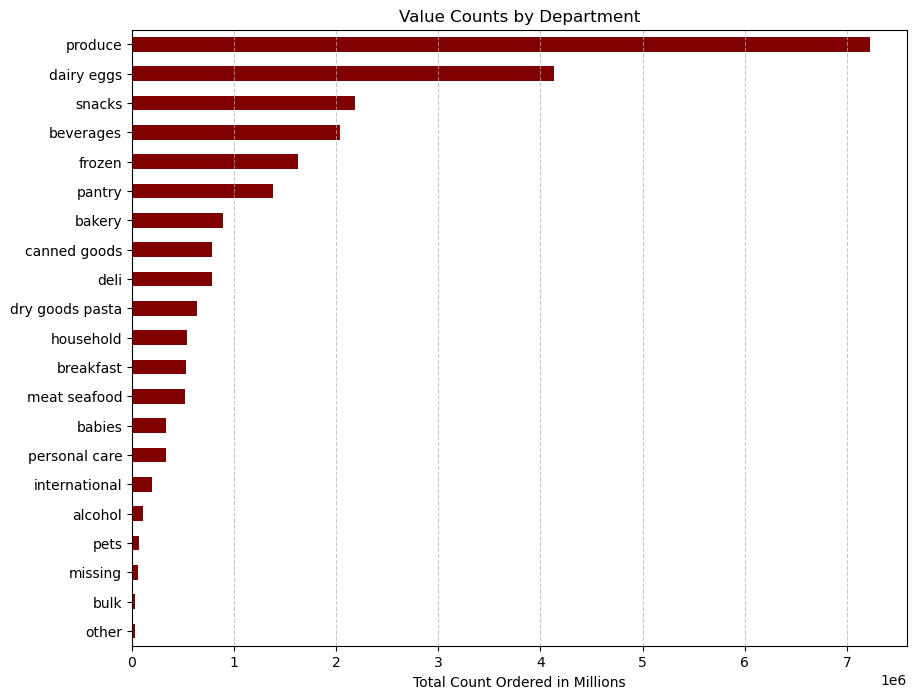

In [43]:
# Plotting horizontal bar chart for value counts of each department

plt.figure(figsize=(10, 8))

dep_counts = cust_departments['department_name'].value_counts(dropna = False)

dep_counts.plot(kind='barh', color='maroon')

# Add labels and a title
plt.xlabel('Total Count Ordered in Millions')
plt.ylabel('')
plt.title('Value Counts by Department')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

#Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'value_counts_by_dep.png'))

# Show the plot
plt.show()

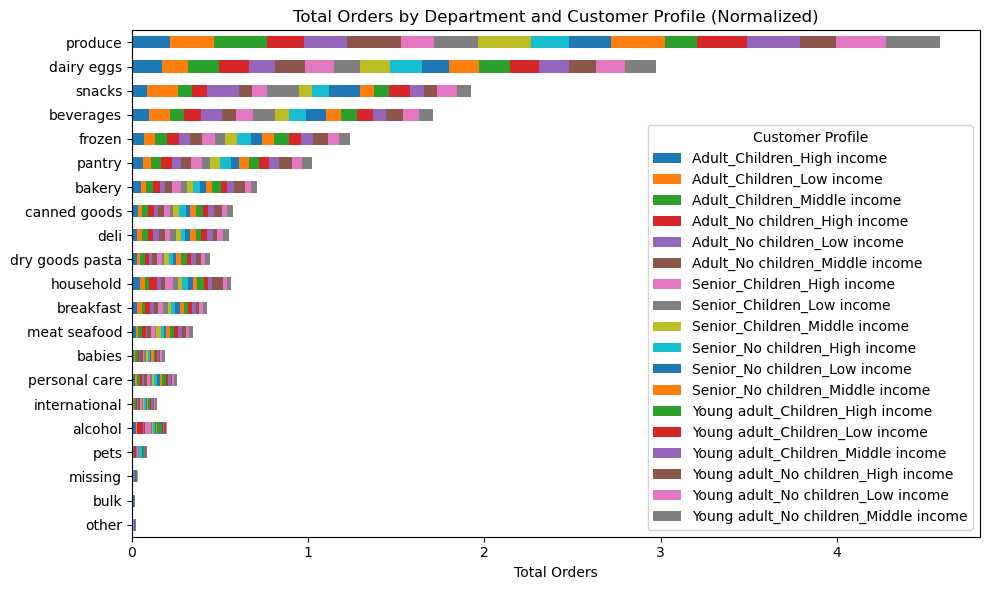

In [44]:
# Make a bar chart for total orders by department_name and normalized customer profiles

# Group by 'department_name' and 'customer_profile', and count the occurrences
department_profile_counts = cust_departments.groupby(['department_name', 'customer_profile']).size().unstack()

# Normalize the data along the vertical axis (columns/customer_profile)
normalized_data = department_profile_counts.div(department_profile_counts.sum(axis=0), axis=1)

# Sort the data by total orders in descending order
total_orders = department_profile_counts.sum(axis=1)
sorted_data = normalized_data.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized regions
ax = sorted_data.plot.barh(stacked=True, figsize=(10, 6))

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Total Orders')
plt.ylabel('')
plt.title('Total Orders by Department and Customer Profile (Normalized)')

# Add a legend with a title
plt.legend(title='Customer Profile', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_profile_normalizedd.png'))

plt.show()

In [45]:
sorted_data

customer_profile,Adult_Children_High income,Adult_Children_Low income,Adult_Children_Middle income,Adult_No children_High income,Adult_No children_Low income,Adult_No children_Middle income,Senior_Children_High income,Senior_Children_Low income,Senior_Children_Middle income,Senior_No children_High income,Senior_No children_Low income,Senior_No children_Middle income,Young adult_Children_High income,Young adult_Children_Low income,Young adult_Children_Middle income,Young adult_No children_High income,Young adult_No children_Low income,Young adult_No children_Middle income
department_name,,,,,,,,,,,,,,,,,,
produce,0.216388,0.246545,0.301744,0.210015,0.245756,0.303719,0.190995,0.248332,0.303344,0.213808,0.238611,0.304409,0.185092,0.280121,0.303321,0.205276,0.280050,0.305731
dairy eggs,0.172580,0.147387,0.171172,0.170199,0.148894,0.170889,0.163922,0.147452,0.171154,0.180008,0.155432,0.171138,0.174778,0.163253,0.173646,0.153360,0.164563,0.172175
snacks,0.084511,0.176125,0.077847,0.086437,0.179833,0.077092,0.087233,0.177346,0.077978,0.092080,0.175407,0.079231,0.089298,0.116175,0.078019,0.075207,0.114395,0.077291
beverages,0.097806,0.116741,0.079647,0.096500,0.118407,0.078840,0.100683,0.123347,0.078838,0.096823,0.116206,0.079878,0.090894,0.092198,0.076511,0.092325,0.093870,0.079232
frozen,0.070677,0.060027,0.067700,0.068401,0.060447,0.067848,0.076224,0.058513,0.067638,0.076747,0.066138,0.068196,0.085309,0.065874,0.066966,0.084327,0.062062,0.065583
pantry,0.061495,0.047561,0.058091,0.062518,0.047343,0.057830,0.060857,0.047418,0.057947,0.059636,0.046102,0.057702,0.058981,0.053841,0.057858,0.073102,0.054924,0.056988
bakery,0.049762,0.031745,0.036747,0.041760,0.030020,0.037608,0.051678,0.030299,0.036891,0.042186,0.029349,0.036463,0.050262,0.035073,0.036674,0.062439,0.034541,0.037306
canned goods,0.035356,0.021828,0.033651,0.034225,0.020590,0.033500,0.035120,0.020622,0.033834,0.039051,0.021995,0.032517,0.039606,0.029799,0.033477,0.046724,0.029767,0.033541
deli,0.027407,0.030080,0.032102,0.030044,0.033576,0.032745,0.031663,0.029500,0.032264,0.023295,0.029147,0.032401,0.029576,0.032130,0.031955,0.026238,0.031927,0.032389


Produce, dairy eggs, and snacks stand out as our top 3 departments, with beverages being not too far behind snacks.

### Compare top 5 customer profiles to top 5 departments (prices)

In [46]:
# Select top 5 customer profiles and compare department spending habits
top_five = ['Adult_Children_Middle income', 'Senior_Children_Middle income', 'Young adult_Children_Middle income', 'Adult_No children_Middle income', 'Young adult_Children_Low income']
top_five_df = cust_departments[cust_departments['customer_profile'].isin(top_five)]

In [47]:
# View results
top_five_df.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
150,2322397,709,7,9.0,Senior_Children_Middle income,beverages
154,2322397,709,4,2.9,Senior_Children_Middle income,produce
158,2322397,709,19,2.1,Senior_Children_Middle income,snacks
160,2322397,709,16,3.9,Senior_Children_Middle income,dairy eggs
177,2322397,709,12,11.9,Senior_Children_Middle income,meat seafood


In [48]:
top_five_df.shape

(18961163, 6)

In [49]:
#Group by customer_profile and department_name, then calculate the sum of prices
top_five_dep_df = top_five_df.groupby(['customer_profile', 'department_name'])['prices'].sum().reset_index()

In [50]:
# View results
top_five_dep_df

,customer_profile,department_name,prices
0,Adult_Children_Middle income,alcohol,213256.5
1,Adult_Children_Middle income,babies,709017.7
2,Adult_Children_Middle income,bakery,1826735.3
3,Adult_Children_Middle income,beverages,3912702.3
4,Adult_Children_Middle income,breakfast,1077789.8
...,...,...,...
100,Young adult_Children_Middle income,pantry,2004817.0
101,Young adult_Children_Middle income,personal care,457396.5
102,Young adult_Children_Middle income,pets,102930.6
103,Young adult_Children_Middle income,produce,10486194.6


In [54]:
# Reduce df to top 5 departments

top_five_deps = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']
top_five_deps_cust_df = top_five_dep_df[top_five_dep_df['department_name'].isin(top_five_deps)]

In [55]:
# View results
top_five_deps_cust_df

,customer_profile,department_name,prices
3,Adult_Children_Middle income,beverages,3912702.3
7,Adult_Children_Middle income,dairy eggs,9046200.4
10,Adult_Children_Middle income,frozen,3304353.9
19,Adult_Children_Middle income,produce,15197245.9
20,Adult_Children_Middle income,snacks,2086966.3
24,Adult_No children_Middle income,beverages,1317971.6
28,Adult_No children_Middle income,dairy eggs,3075676.4
31,Adult_No children_Middle income,frozen,1120823.5
40,Adult_No children_Middle income,produce,5186591.2
41,Adult_No children_Middle income,snacks,701565.4


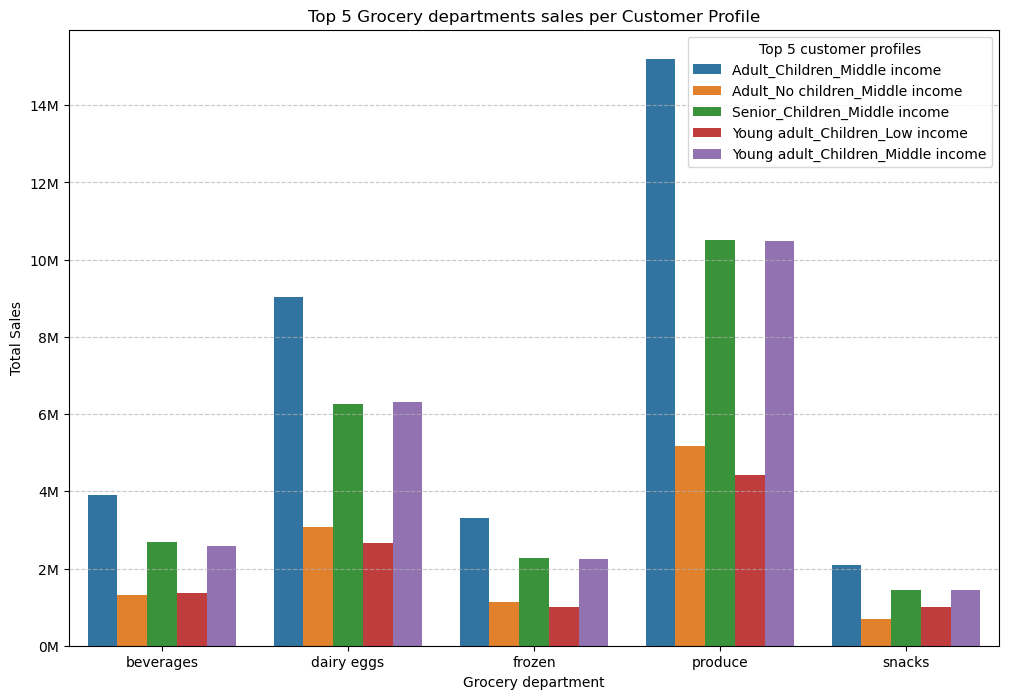

In [58]:
# Plot bar chart to compare top 5 customer profile spending habits across top 5 departments

plt.figure(figsize=(12, 8))
sns.barplot(x='department_name', y='prices', hue='customer_profile', data=top_five_deps_cust_df)
plt.title('Top 5 Grocery departments sales per Customer Profile')
plt.xlabel('Grocery department')
plt.ylabel('Total Sales')

# Access the current axis (ax) after creating the plot
ax = plt.gca()

# Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Modify legend title
plt.legend(title='Top 5 customer profiles')

# Save plot before showing
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top_5_cust_deps.png'))

plt.show()

Our top 5 customer profiles exhibit similar spending habits across grocery departments.